# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


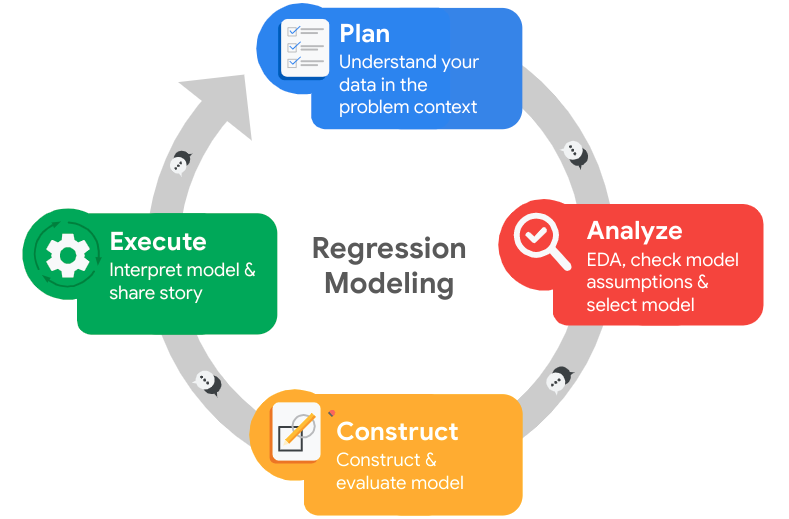

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




**Who are your stakeholders for this project?**
The stakeholders for this project include the HR department at Salifort Motars, who seek data-driven insights to enhance employee satisfaction levels and reduce turnover. Additionally, management and executives at the company are invested in retaining talent and improving organisational performance.

**What are you trying to solve or accomplish?**
The primary goal of this project is to analyse the HR dataset provided and develop a predictive model to identify factors influencing employee turnover. By understanding these factors, the company aims to implement targeted strategies to increase retention rates and improve overall employee satisfaction.

**What are your initial observations when you explore the data?**
Initial observations from exploring the data reveal key variables such as satisfaction level, last evaluation score, number of projects, average monthly hours, tenure with the company, work accidents, promotions in the last 5 years, department, and salary. These variables offer insight into potential predictors of employee turnover and provide a foundation for model development.

**What resources do you find yourself using as you complete this stage? (Make sure to include the links.)**
Resources utilized during this stage include the HR dataset provided, which contains 15,000 rows and 10 columns, and the source of the dataset on Kaggle for additional context and insights. The link to the Kaggle dataset is [here](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

**Do you have any ethical considerations at this stage?**
Ethical considerations in this stage involve ensuring the privacy and confidentiality of employee data. It's essential to handle and analyse the data in compliance with privacy regulations and company policies to protect employee confidentiality and prevent potential biases in the model development process. Additionally, transparency in the use of predictive models and ethical considerations regarding potential impacts on employees should be prioritised throughout the project.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ###

# For data manipulation
import numpy as np
import pandas as pd

# For data visualisations
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modelling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import plot_tree

# For saving models
import pickle as plk

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns={"average_montly_hours": "average_monthly_hours", 
                          "time_spend_company": "years_with_company",
                          "Work_accident": "work_accident", 
                          "Department": "department"})

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'years_with_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
years_with_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

The check for duplicates reveals that within our dataset there are 3,008 rows containing duplicate entries - approximately 20% of our data. This is a very significant portion.

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated() == True]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,years_with_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


The output above shows the first and last five occurences of rows that are duplicated within our dataframe. For an entry to be considered duplicated, the response would need to be identical across all ten column responses. Therefore, it seems unlikely that the duplicated entries would be legitmate responses from different employees. Additionally, given that there are several columns with continous variables, it seems even more unlikely that the duplicated observations are legitimate. For this reason, we will drop the duplicated rows.

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,years_with_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

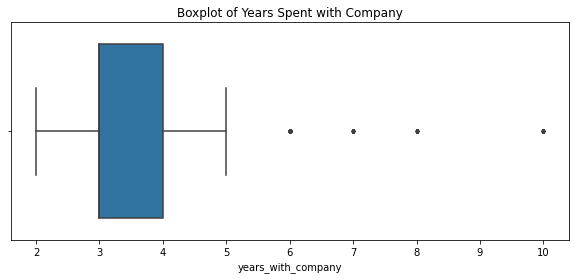

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize=(10,4))
plt.title("Boxplot of Years Spent with Company")
sns.boxplot(x=df1["years_with_company"], fliersize=3);

The boxplot above shows that there are outliers within the `years_with_company` variable. It would be useful to know how many rows are outliers within the `years_with_company` column.

In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

# Establish lower and upper quartiles
q1 = df1["years_with_company"].quantile(0.25)
q3 = df1["years_with_company"].quantile(0.75)

# Determine the interquartile range
iqr = q3 - q1

# Calculate the outlier threshold value
outlier_threshold = q3 + 1.5*iqr
print("Outlier Threshold: ", outlier_threshold)

# Count the number of rows that exceed the outlier threshold
outlier_count = df1[df1["years_with_company"] > outlier_threshold]
print("Number of outliers within the 'years_with_company' column: ", len(outlier_count))

Outlier Threshold:  5.5
Number of outliers within the 'years_with_company' column:  824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
number_left = df1['left'].value_counts()
print(number_left)
print()

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
percentage_left = df1['left'].value_counts(normalize=True)
print(percentage_left)

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

The variables of `number_project` and `average_monthly_hours` would both be good indicators of employee retention given that overworking employees tends to lead to unhappiness and dissatisfaction, which may result in employee departure. As such, I'll be plotting two visualisations, the first being a stacked boxplot showing `average_monthly_hours` distributions for `number_project`, comparing the distributions of employees who stayed versus those that did not. Accompanying this, I will also produce a stacked histogram to visualise the count and distribution of `number_project` for those who stayed and those who left. The histogram will provide some context to the accompanying boxplot graphs.

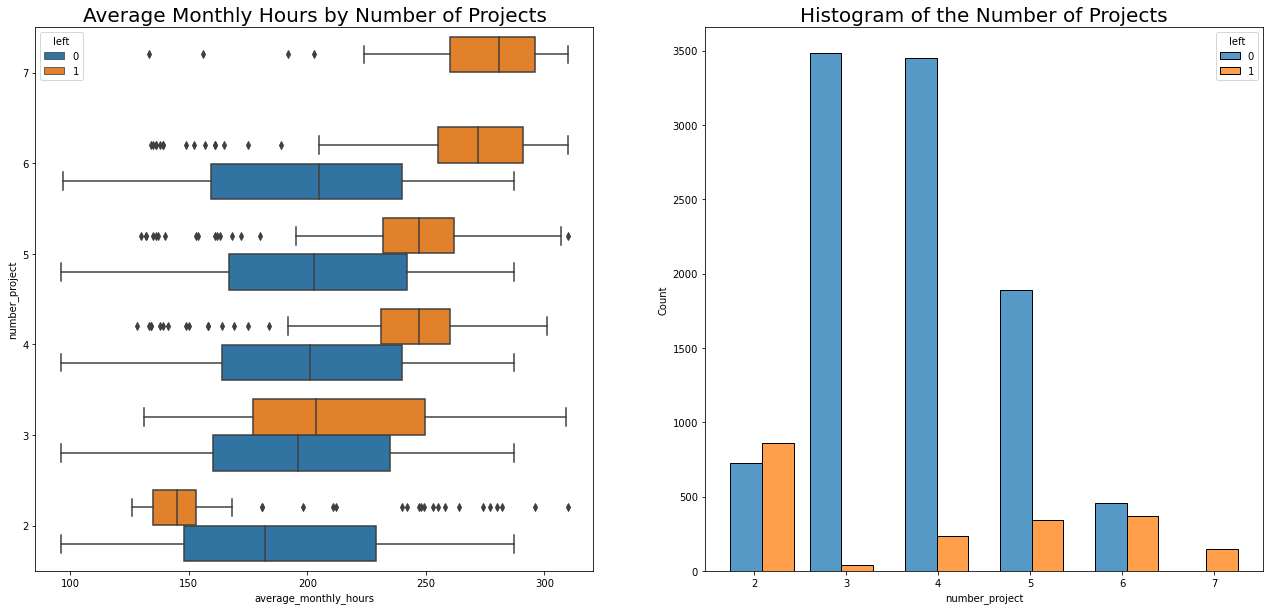

In [14]:
# Create a plot as needed
### YOUR CODE HERE ###

# Set the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(22,10))

# Create a boxplot showing 'average_monthly_hours' distributions for 'number_project', comparing employee retention
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title("Average Monthly Hours by Number of Projects", fontsize='20')

# Create a histogram showing the distribution of 'number_project', comparing employee retention
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=4, ax=ax[1])
ax[1].set_title("Histogram of the Number of Projects", fontsize='20')

# Display the plots
plt.show()

The boxplot illustrates that within our dataset that employees with more projects tended to also work longer hours, with the mean hours of each group (both remaining and departing the company) increasing with the number of projects worked. The following are some key observations:

1. There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects. 

2. Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255&ndash;295 hours/month&mdash;much more than any other group. 

3. The optimal number of projects for employees to work on seems to be 3&ndash;4. The ratio of left/stayed is very small for these cohorts.

4. If you assume a work week of 40 hours and four weeks of vacation per year, then the average number of working hours per month of employees working Monday&ndash;Friday `= 48 weeks * 40 hours per week / 12 months = 160 hours per month`. This means that, aside from the employees who worked on two projects, every group (even those who didn't leave the company) worked considerably more hours than this. It seems that employees here are overworked.

Lastly, we can determine the number of employees who left the company that had seven projects to work on:

In [15]:
df1[df1['number_project'] == 7]['left'].value_counts()

1    145
Name: left, dtype: int64

The above confirms that no employees with seven projects stayed with the company, and that the total number of employees who left within this group was 145 employees.

Continuing on with the visualisations, it'd be interesting to see the relationship between `average_monthly_hours` and `satisfaction_level` and determine if this has an impact on as to whether employees choose to stay or leave the company.

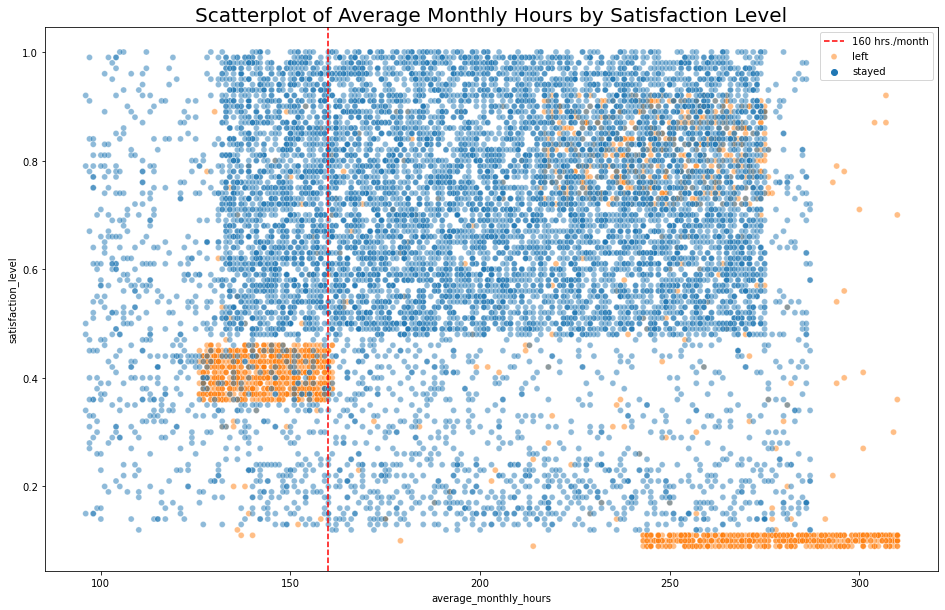

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create a scatterplot of 'average_monthly_hours' and 'satisfaction_levels', comparing employee retention
plt.figure(figsize=(16,10))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.5)
plt.axvline(x=160, color='r', label='160 hrs./month', ls='--')
plt.legend(labels=['160 hrs./month', 'left', 'stayed'])
plt.title("Scatterplot of Average Monthly Hours by Satisfaction Level", fontsize=20)
plt.show()

The scatterplot above shows that there was a sizeable group of employees who worked ~240&ndash;315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero. 

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels. 

Finally, there is a group who worked ~210&ndash;280 hours per month, and they had satisfaction levels ranging ~0.7&ndash;0.9. 

Note the strange shape of the distributions here. This is indicative of data manipulation or synthetic data. 

For the next series of visualistions, it'd be interesting to see the relationship between satisfaction levels and time spent with the company. Again, we will be illustrating these relationships with a boxplot visual accompanied by a histogram of the distribution of `years_with_company`, comparing employee retention, to provide context.

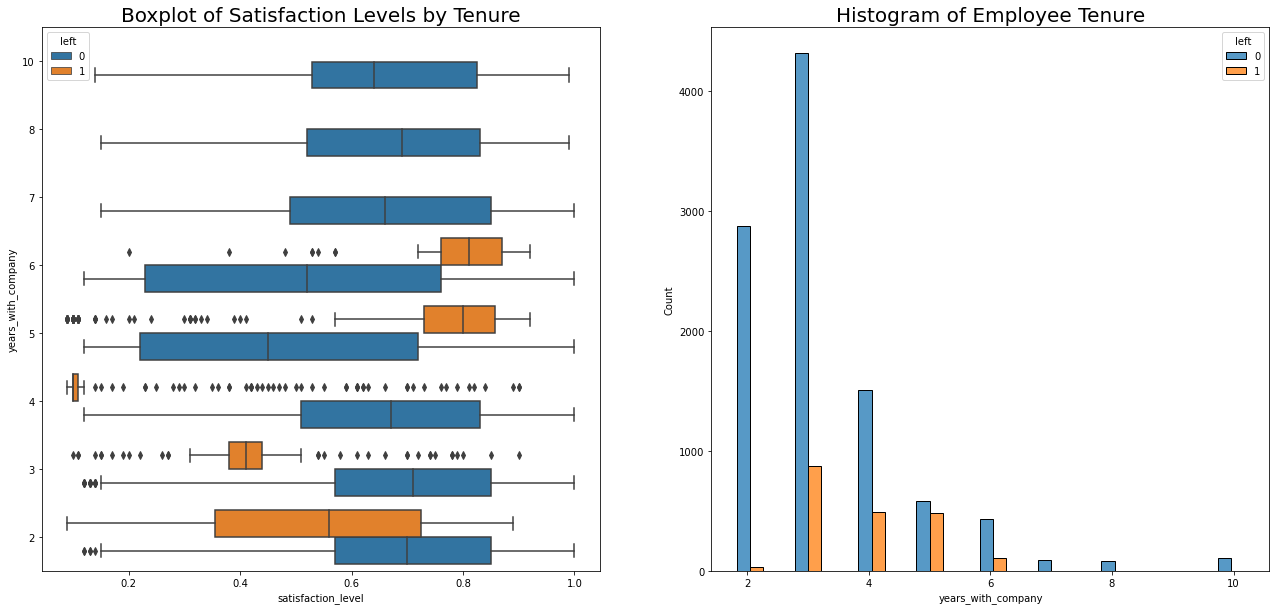

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###

# Set the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(22,10))

# Create a boxplot showing 'satisfaction_level' distributions for 'years_with_company', comparing employee retention
sns.boxplot(data=df1, x='satisfaction_level', y='years_with_company', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title("Boxplot of Satisfaction Levels by Tenure", fontsize=20)

# Create a histogram showing the distribution of 'years_with_company', comparing employee retention
sns.histplot(data=df1, x='years_with_company', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title("Histogram of Employee Tenure", fontsize=20)

# Display the plots
plt.show()

There are a few observations to make based on the two plots:
- Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
- Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible. 
- The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed. 
- The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

As the next step in analyzing the data, I will calculate the mean and median satisfaction scores of employees who left and those who didn't.

In [18]:
df1.groupby(['left'])[['satisfaction_level']].agg([np.mean, np.median])

satisfaction_level       
                   mean median
left                          
0              0.667365   0.69
1              0.440271   0.41

As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left. 

The next stage of the EDA process will examine salary levels for different employee tenures.

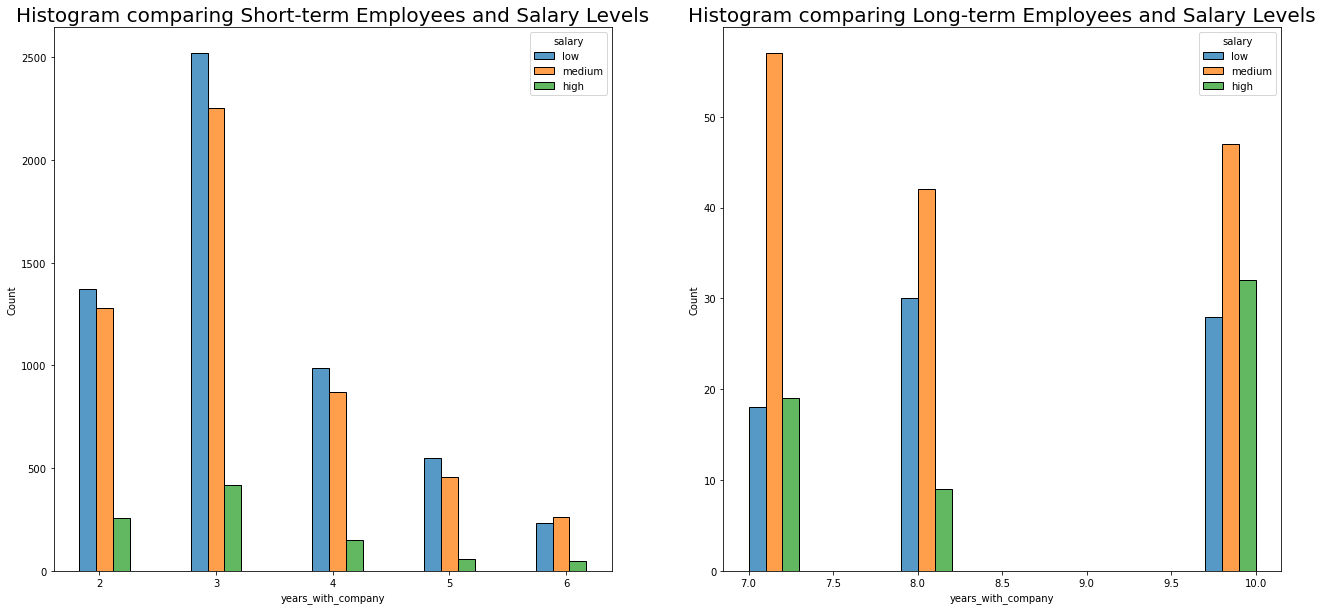

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###

# Set the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(22,10))

# Define short-term employees (6 years or less)
short_term = df1[df1['years_with_company'] <= 6]

# Define long-term employees (7 years or more)
long_term = df1[df1['years_with_company'] >= 7]

# Plot histogram of short-term employees, comparing employee salary levels
sns.histplot(data=short_term, x='years_with_company', hue='salary', hue_order=['low', 'medium', 'high'],
             multiple='dodge', shrink=5, ax=ax[0])
ax[0].set_title("Histogram comparing Short-term Employees and Salary Levels", fontsize=20)

# Plot histogram of long-term employees, comparing employee salary levels
sns.histplot(data=long_term, x='years_with_company', hue='salary', hue_order=['low', 'medium', 'high'],
             multiple='dodge', shrink=1, ax=ax[1])
ax[1].set_title("Histogram comparing Long-term Employees and Salary Levels", fontsize=20)

# Display the plots
plt.show()

The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees. 

Next we'll explore whether there's a correlation between working long hours and receiving high evaluation scores. To do this we will create a scatterplot of `average_monthly_hours` versus `last_evaluation`.

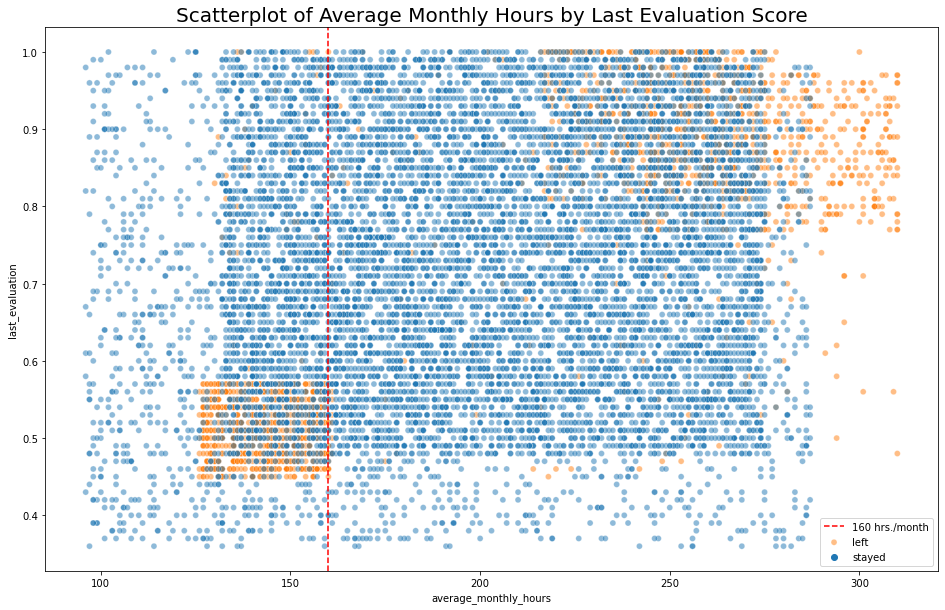

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create a scatterplot of 'average_monthly_hours' and 'last_evaluation', comparing employee retention
plt.figure(figsize=(16,10))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.5)
plt.axvline(x=160, color='r', label='160 hrs./month', ls='--')
plt.legend(labels=['160 hrs./month', 'left', 'stayed'])
plt.title("Scatterplot of Average Monthly Hours by Last Evaluation Score", fontsize=20)
plt.show()

The following observations can be made from the scatterplot above:
- The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 160 hours with lower evaluation scores. 
- There seems to be a slight correlation between hours worked and evaluation score. 
- There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
- Most of the employees in this company work well over 160 hours per month.

Next, we'll examine the relationship between employees who worked very long hours were promoted in the last five years.

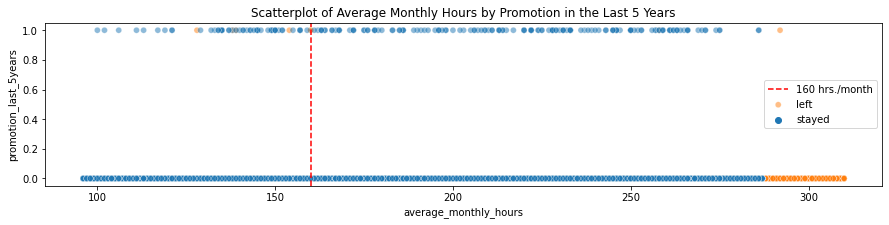

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create a scatterplot of 'average_monthly_hours' and 'promotion_last_5years', comparing employee retention
plt.figure(figsize=(15,3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.5)
plt.axvline(x=160, color='r', label='160 hrs./month', ls='--')
plt.legend(labels=['160 hrs./month', 'left', 'stayed'])
plt.title("Scatterplot of Average Monthly Hours by Promotion in the Last 5 Years")
plt.show()

The plot above shows the following:
- very few employees who were promoted in the last five years left
- very few employees who worked the most hours were promoted
- all of the employees who left were working the longest hours  

Next, we'll inspect how the employees who left are distributed across departments.

In [22]:
# Display the counts relating to each department
df1['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

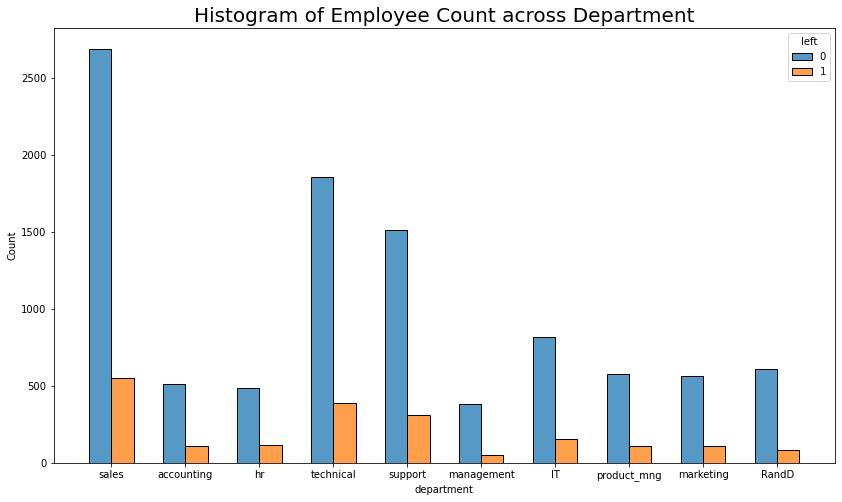

In [23]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create a histogram showing the distribution of employees across 'department', comparing employee retention
plt.figure(figsize=(14,8))
sns.histplot(data=df1, x='department', hue='left', multiple='dodge', shrink=0.6)
plt.title("Histogram of Employee Count across Department", fontsize=20)
plt.show()

There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed. 

Lastly, we will check for strong correlations between variables in the data.

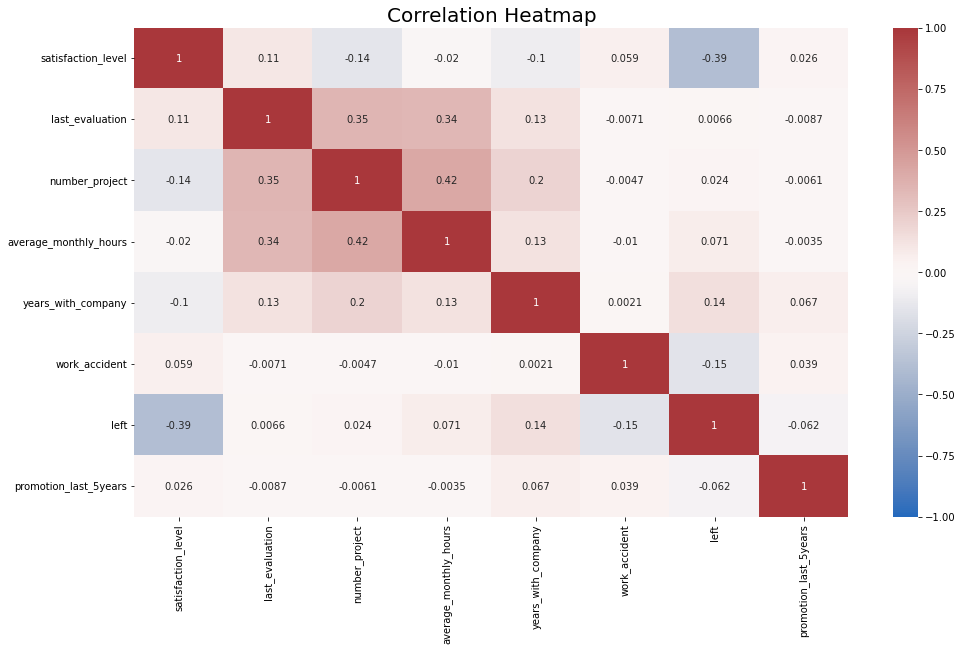

In [24]:
# Create a plot as needed
### YOUR CODE HERE ###

# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title("Correlation Heatmap", fontsize=20)
plt.show()

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

### Insights

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave. 

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Our goal in this project is to predict whether an employee leaves the company, which is a categorical outcome variable. Therefore, this task involves classification, more specifically, this is a binary classification task since the outcome variable `left` can be either 1 (indicating that the employee has left) or 0 (indicating that the employee remained with the company).

### Identify the types of models most appropriate for this task.

Given that the variable we want to predict (whether an employee leaves the company or not) is categorical, we can either build a Logistic Regression model or a Tree-based Machine Learning model.

I will be attempting to implement both models as this will provide me with good practice in working with both model types and would also be good for result comparison.

### Modeling Approach A: Logistic Regression Model

This approach covers the implementation of a Logistic Regression Model.

#### Logistic regression
Note that binomial logistic regression suits the task because it involves binary classification.

Before splitting the data, we need to encode the non-numeric variables. There are two: `department` and `salary`. 

`department` is a categorical variable, which means you can dummy it for modeling. 

`salary` is categorical too, but it's ordinal. There's a hierarchy to the categories, so it's better not to dummy this column, but rather to convert the levels to numbers, 0&ndash;2.

In [25]:
### YOUR CODE HERE ###

# Copy the dataframe
df_enc = df1.copy()

# Encode the 'salary' column as an ordinal numeric category
df_enc['salary'] = (df_enc['salary'].astype('category')
                    .cat.set_categories(['low', 'medium', 'high'])
                    .cat.codes
                    )

# Dummy encode the 'department' column
df_enc = pd.get_dummies(df_enc, drop_first=True)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,years_with_company,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


Now we'll create a heatmap to visualise how correlated our variables are.

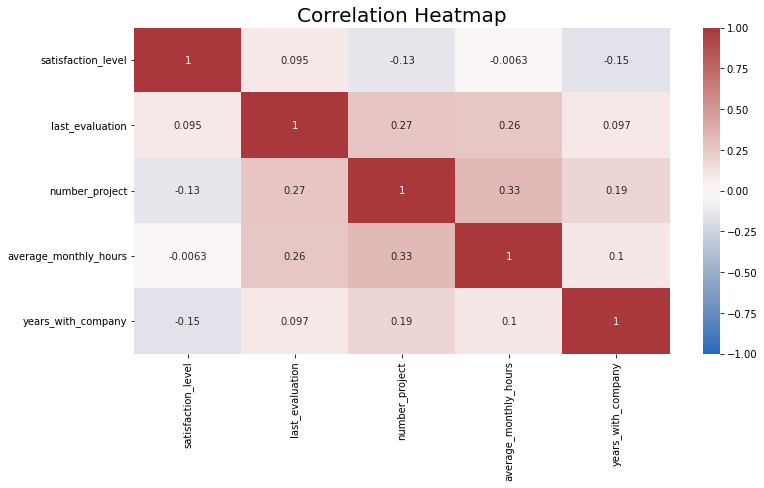

In [26]:
# Plot a correlation heatmap of our new dataframe to visualise how correlated our variables are
plt.figure(figsize=(12,6))
heatmap = sns.heatmap(df_enc[["satisfaction_level", "last_evaluation", "number_project", "average_monthly_hours", "years_with_company"]]
                      .corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title("Correlation Heatmap", fontsize=20)
plt.show()

Considering logistic regression models are quite sensitive to outliers, at this stage of the analysis, it would be a good idea to remove the outliers within the `years_with_company` column that were identified earlier in the analysis.

In [27]:
# Establish the lower and upper quartiles
q1 = df_enc['years_with_company'].quantile(0.25)
q3 = df_enc['years_with_company'].quantile(0.75)

# Determine the interquartile range
iqr = q3 - q1

# Calculate the upper and lower limits
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr

# Create a new dataframe without the presence of the 'years_with_company' outliers
df_logreg = df_enc[(df_enc['years_with_company'] >= lower_limit) & (df_enc['years_with_company'] <= upper_limit)]

# Display the first few rows of the new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,years_with_company,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,1,0,0


The next step in the analytical process is to isolate the outcome variable (the variable that we want our model to predict) and select the features that we want to include in our model (these will be the features that will help us predict the outcome variable, `left`).

In [28]:
# Set the y variable 
y = df_logreg['left']

# Set the X variables with the features of desire
X = df_logreg.drop(columns='left')

# Display the first few rows of both the outcome variable and selected features
print(y.head())
X.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,years_with_company,work_accident,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,1,0,0


We will now proceed with splitting the data into training and testing sets. Additionally, as the classes are unbalanced, we will also be stratifying the data based on the values of outcome variable (`y`).

In [29]:
# Create training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

We will now instantiate the model and fit it to the training data.

In [30]:
# Instaniate the model and fit this to the training data
clf = LogisticRegression(solver='liblinear').fit(X_train, y_train)

Test the logistic regression model using the test data set.

In [31]:
y_pred = clf.predict(X_test)

Next we'll begin to analyse the results of our model by printing out the model's accuracy, precision, recall and F1 scores.

In [32]:
# Print out the model's accuracy, precision, recall and F1 scores
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
F1_score = metrics.f1_score(y_test, y_pred)

print("Model's accuracy score is: ", accuracy)
print("Model's precision score is: ", precision)
print("Model's recall score is: ", recall)
print("Model's F1 score is: ", F1_score)

Model's accuracy score is:  0.8202005730659025
Model's precision score is:  0.44483985765124556
Model's recall score is:  0.2653927813163482
Model's F1 score is:  0.33244680851063835


Based on the provided logistic regression modelling results, the model demonstrates moderate performance with an accuracy score of approximately 82.02%. This indicates that the model correctly predicts the outcome (employee turnover) approximately 82% of the time, which is a decent level of overall predictive accuracy.

However, when examining the precision score, which measures the proportion of correctly predicted positive cases (employees leaving the company) out of all cases predicted as positive, we observe a lower value of approximately 44.48%. This suggests that while the model identifies some employees who actually leave the company, there is also a notable proportion of false positives, where employees are predicted to leave when they do not.

Similarly, the recall score, which represents the proportion of actual positive cases (employees leaving the company) that were correctly predicted by the model, is relatively low at around 26.54%. This indicates that the model has a considerable number of false negatives, where it fails to identify employees who actually leave the company.

Consequently, the F1 score, which is the harmonic mean of precision and recall, provides a balanced measure of the model's performance, taking into account both false positives and false negatives. With an F1 score of approximately 33.24%, the model demonstrates a moderate balance between precision and recall, indicating that it achieves a reasonable trade-off between correctly identifying true positives and minimizing false positives and false negatives.

Overall, while the model exhibits decent accuracy, it may benefit from further optimization to improve precision and recall, potentially through feature engineering, adjusting classification thresholds, or exploring alternative modeling techniques. Additionally, domain expertise and contextual understanding of the specific business case are crucial for interpreting and refining the model's results effectively.

Next, we will create a Confusion Matrix to better visualise the results of our Logistic Regression model.

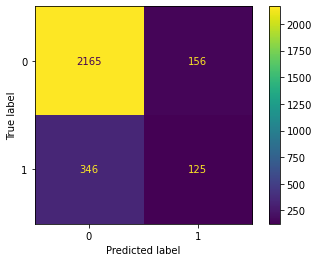

In [33]:
# Calculate the values for each quadrant in the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Create the confusion matrix as a visualisation
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

# Plot confusion matrix
disp.plot(values_format='')

# Display the confusion matrix
plt.show()

The upper-left quadrant displays the number of true negatives.
The upper-right quadrant displays the number of false positives.
The bottom-left quadrant displays the number of false negatives.
The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

Next we'll check the class balance in the data. Specifically, this means checking the value counts in the `left` column. This is important given that this is a binary classification task and the class balance will inform the way we interpret the accuracy metrics.

In [34]:
# Calculate the class balance
df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

There is an approximately 83%-17% split. So the data is not perfectly balanced, but it is not too imbalanced. If it was more severely imbalanced, you might want to resample the data to make it more balanced. In this case, you can use this data without modifying the class balance and continue evaluating the model.

Next, we'll summarise the results from our metric scores and confusion matrix in a classification report to evaluate the performance of the logistic regression model.

In [35]:
# Create a classification report for our Logistic Regression Model
target_labels = ["Stayed", "Left"]
print(metrics.classification_report(y_test, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

      Stayed       0.86      0.93      0.90      2321
        Left       0.44      0.27      0.33       471

    accuracy                           0.82      2792
   macro avg       0.65      0.60      0.61      2792
weighted avg       0.79      0.82      0.80      2792




The classification report provides detailed insights into the performance of the logistic regression model for predicting employee turnover. Here's a breakdown of the key metrics:
1. Precision:
    * Precision measures the accuracy of positive predictions made by the model.
    * For the "Stayed" class (employees who stayed in the company), the precision is relatively high at 86%. This indicates that when the model predicts an employee will stay, it is correct approximately 86% of the time.
    * However, for the "Left" class (employees who left the company), the precision is lower at 44%. This suggests that when the model predicts an employee will leave, it is correct only about 44% of the time.
2. Recall:
    * Recall, also known as sensitivity or true positive rate, measures the proportion of actual positives that were correctly identified by the model.
    * For the "Stayed" class, the recall is high at 93%, indicating that the model correctly identifies approximately 93% of employees who actually stayed in the company.
    * Conversely, for the "Left" class, the recall is lower at 27%, meaning that the model only captures about 27% of employees who actually left the company.
3. F1-score:
    * The F1-score is the harmonic mean of precision and recall and provides a balanced measure of the model's performance.
    * The F1-score for the "Stayed" class is 0.90, reflecting a good balance between precision and recall for this class.
    * However, the F1-score for the "Left" class is lower at 0.33, indicating that there is room for improvement in the model's ability to correctly identify employees who leave the company.
4. Accuracy:
    * The overall accuracy of the model is 82%, which represents the proportion of correctly predicted outcomes (both "Stayed" and "Left" classes) out of the total number of predictions.
    * While accuracy provides a general measure of model performance, it may not be the most reliable metric in imbalanced datasets, where one class (e.g., "Stayed") dominates the other (e.g., "Left").
5. Support:
    * Support refers to the number of actual occurrences of each class in the dataset.
    * In this case, there are 2321 instances of employees who stayed and 471 instances of employees who left the company.

In summary, while the model demonstrates good performance in predicting employees who stayed in the company (high precision, recall, and F1-score), it exhibits weaker performance in predicting employees who left (lower precision, recall, and F1-score). Further optimisation of the model, such as feature engineering or adjusting classification thresholds, may be necessary to enhance its ability to accurately identify employees at risk of leaving the company. Additionally, considering the imbalanced nature of the dataset, techniques like oversampling or using alternative evaluation metrics tailored to imbalanced datasets could be explored to improve model performance further.

### Modeling Approach B: Tree-based Model
This approach involves the implementation of Decision Tree and Random Forest. 

Prior to modelling, we will need to split the data into features/target variable and training and/testing data.
1. Define a variable `y` that isolates the target variable (`left`).
2. Define a variable `X` that isolates the features.
3. Split the data into training and testing sets. Put 25% of the samples into the test set, stratify the data, and set the random state.

Additionally, as Decision Tree and Random Forest models are capable of handling outliers, we do not need to remove the outliers like we did for our Logistic Regression Model.

In [36]:
# Isolate the target variable (y)
y = df_enc['left']

# Isolate the features (X)
X = df_enc.drop(['left'], axis=1)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### Decision tree - Round 1

At this stage we will begin the model optimisation process by constructing a decision tree model and set up cross-validated grid-search to exhuastively search for the best model parameters.

Additionally, we will also be setting our `refit` parameter to `roc_auc`. In the context of our current project, where we aim to predict whether an employee will leave the company, selecting the `roc_auc` parameter as our `refit` variable is appropriate for several reasons. Firstly, ROC-AUC provides a comprehensive evaluation of the model's ability to correctly classify both the employees who leave and those who stay, considering various threshold values. Since our primary goal is to identify employees at risk of leaving, we want a model that can effectively distinguish between the two classes, minimising both false positives and false negatives. Moreover, ROC-AUC is robust to class imbalance, a common characteristic in employee attrition datasets where the number of employees leaving is often smaller than those staying. By prioritising ROC-AUC optimisation during model training, we ensure that our predictive model is well-tuned to handle the nuances of our dataset, ultimately leading to more accurate predictions of employee turnover.

In [37]:
# Instantiate the decision tree classifer
dt = DecisionTreeClassifier(random_state = 0)

# Create a dictionary of hyperparameters to tune
cv_params = {"max_depth": [2,4,6,8,10,15,20,30,40,50, None],
             "min_samples_leaf": [2,3,4,5,6,7,8,9, 10, 15, 20, 50],
             "min_samples_split": [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}

# Define a set of scoring metrics to capture
scoring = {"accuracy", "precision", "recall", "f1", "roc_auc"}

# Instantiate the GridSearchCV object
clf_tree = GridSearchCV(dt,
                        cv_params,
                        scoring = scoring,
                        cv = 5,
                        refit = 'roc_auc')

We will now fit the decision tree model to the training data.

In [38]:
%%time
clf_tree.fit(X_train, y_train)

CPU times: user 2min 47s, sys: 151 ms, total: 2min 47s
Wall time: 2min 47s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 4, 6, 8, 10, 15, 20, 30, 40, 50,
                                       None],
      

Examine the best `roc_auc` score achieved by the decision tree model on the training set.

In [39]:
# Calculate the best 'roc_auc' score
clf_tree.best_score_

0.9734949166872425

An ROC-AUC score of 0.9734 indicates that our predictive model performs exceptionally well in distinguishing between employees who stay and those who leave the company. With a score close to 1, the model demonstrates high discriminatory power, suggesting that it effectively ranks the probabilities of employee attrition. This robust performance is crucial for our project's success, as accurately identifying employees at risk of leaving is vital for implementing proactive retention strategies. Additionally, the high ROC-AUC score implies that our model is well-tailored to handle class imbalances often present in employee attrition datasets, further bolstering its reliability in real-world scenarios. Overall, this result underscores the effectiveness of our predictive model in addressing the specific challenges of predicting employee turnover.

Examine the best combination of hyperparameters.

In [40]:
# Determine the best combination of hyperparameters
clf_tree.best_params_

{'max_depth': 6, 'min_samples_leaf': 20, 'min_samples_split': 2}

This configuration suggests that the model is relatively shallow with a maximum depth of 6, which helps prevent overfitting by limiting the complexity of the tree. Additionally, setting 'min_samples_leaf' to 20 ensures that each leaf node in the tree contains a minimum of 20 samples, promoting generalisation and preventing the model from capturing noise in the data. 'Min_samples_split' set to 2 indicates that the tree will continue splitting nodes until each leaf contains only one sample, allowing the model to capture intricate decision boundaries in the data. Overall, these hyperparameters strike a balance between model complexity and generalisation, resulting in an effective decision tree classifier for our predictive modeling task of employee attrition.

Next, we'll write a function called `make_results()` that will output all of the socres of our models. This function will accept three arguements.

In [41]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguements:
        model_name (string):     what you want the model to be called in the output table
        model_object:            a fit GridSearchCV object
        metric (string):         accuracy, precision, recall, f1, or roc_auc
    
    Returns a pandas df with the accuracy, precision, recall, f1 and roc_auc scores for the model
    with the best mean 'metric' score across all validation folds.
    '''
    
    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {"accuracy": "mean_test_accuracy",
                   "precision": "mean_test_precision",
                   "recall": "mean_test_recall",
                   "f1": "mean_test_f1",
                   "roc_auc": "mean_test_roc_auc"}
    
    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    
    # Extract Accuracy, Precision, Recall, F1, and ROC_AUC socres from that row
    accuracy = best_estimator_results.mean_test_accuracy
    precision = best_estimator_results.mean_test_precision
    recall = best_estimator_results.mean_test_recall
    f1 = best_estimator_results.mean_test_f1
    roc_auc = best_estimator_results.mean_test_roc_auc
    
    # Create a table of results
    table = pd.DataFrame({"Model": [model_name],
                          "Accuracy": [accuracy],
                          "Precision": [precision],
                          "Recall": [recall],
                          "F1": [f1],
                          "ROC AUC": [roc_auc]
                         }
                        )
    
    return table

Call upon the `make_results()` function on our Decision Tree Classifier object

In [42]:
# Create results table from the output of our Decision Tree Classifier object using our training data
results = make_results("Decision Tree CV", clf_tree, "roc_auc")
results

,Model,Accuracy,Precision,Recall,F1,ROC AUC
0,Decision Tree CV,0.975092,0.941319,0.906902,0.923612,0.973495


All of these scores from the decision tree model are strong indicators of good model performance. 

Its important to acknowledge that decision trees can be vulnerable to overfitting, and that random forests models avoid overfitting by incorporating multiple trees to make predictions. Therefore, as a next action we will construct a random forest model for a side by side comparison.

#### Random forest - Round 1

Similar to the creation of our Decision Tree Model, to construct our Random Forest Model we will set up a cross-validated grid-search to iteratively search for the best model parameters.

In [43]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state = 0)

# Create a dictionary of hyperparameters to tune
cv_params = {"n_estimators": [300, 500],
             "max_depth": [3, 5, None],
             "max_features": [1],
             "max_samples": [0.7, 1.0],
             "min_samples_leaf": [1, 2, 3],
             "min_samples_split": [2, 3, 4]}

# Define a set of scoring metrics to capture
scoring = {"accuracy", "precision", "recall", "f1", "roc_auc"}

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

We will now fit the random forest model to the training data.

In [44]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: user 3min 38s, sys: 853 ms, total: 3min 39s
Wall time: 3min 39s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

Next we'll specify a path to where we will save our model.

In [45]:
# Define a path to the folder where we want to save our model
path = '/home/jovyan/work/'

Define functions to pickel the model and read the model.

In [46]:
def write_pickle(path, model_object, save_as:str):
    '''
    In:
        path:             path of folder where you want to save the pickle
        model_object:     a model you want to pickle
        save_as:          filename for how you want to save the model
    
    Out: A call to pickle the model in the folder indicated
    '''
    
    with open(path + save_as + '.pickle', 'wb') as to_write:
        plk.dump(model_object, to_write)

In [47]:
def read_pickle(path, saved_model_name:str):
    '''
    In:
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in
    
    Out: 
        model: the pickled model
    '''
    
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = plk.load(to_read)
        
    return model

Next we will use the function defined above to save the model in a pickle file and then read it back in.

In [48]:
# Write pickle
write_pickle(path, rf_cv, 'rf_cv1')

In [49]:
# Read pickle
rf_cv = read_pickle(path, 'rf_cv1')

Now we'll examine the best `roc_auc` score achieved by the random forest model on the training dataset .

In [50]:
# Calculate the best 'roc_auc' score
rf_cv.best_score_

0.9784356057021883

Now we'll examine the best combination of hyperparameters.

In [51]:
# Determine the best combination of hyperparameters
rf_cv.best_params_

{'max_depth': None,
 'max_features': 1,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

Next, we will combine the evaulation scores on the training set for both the decision tree and random forest models.

In [52]:
# Get scores on the training data for the random forest model and add this to the existing results table
rf_results = make_results("Random Forest CV", rf_cv, "roc_auc")
combined_results = pd.concat([results, rf_results], axis=0)
combined_results

,Model,Accuracy,Precision,Recall,F1,ROC AUC
0,Decision Tree CV,0.975092,0.941319,0.906902,0.923612,0.973495
0,Random Forest CV,0.974202,0.980113,0.862025,0.917233,0.978436


The decision tree model exhibits impressive performance across various metrics, with an accuracy of 97.51%, precision of 94.13%, recall of 90.69%, F1 score of 92.36%, and ROC AUC of 97.35%. However, the random forest model slightly outperforms the decision tree in terms of accuracy (97.42%) and precision (98.01%), while maintaining a high F1 score (91.72%) and an even better ROC AUC (97.84%). Although the decision tree shows slightly higher recall (90.69% compared to 86.20% for the random forest), the overall performance metrics of the random forest model suggest it provides a more robust and balanced classification. The random forest's ability to aggregate multiple decision trees and reduce overfitting makes it a favorable choice, especially in scenarios where high accuracy and precision are paramount, such as predicting employee attrition. Additionally, the higher ROC AUC score indicates better discrimination between classes, further validating the superiority of the random forest model for our predictive modeling task. Therefore, we choose to proceed with the random forest model for its superior performance and robustness.

Given the very close results of our evaluation scores between both models, it's important to note that the selection of either model would be acceptable in our context. However, due to the slightly superior performance and robustness exhibited by the random forest model, especially in terms of accuracy, precision, and ROC AUC, we choose to proceed with it for our predictive modelling task.

Now that we have chosen our model (Random Forest Model), we can evaluate this model on the test set. First we will use our model to predict on the test data and assign the results to a variable called `rf_preds`.

In [53]:
# Get scores on test data
rf_preds = rf_cv.best_estimator_.predict(X_test)

Use the following `get_test_scores()` function to obtain the scores of our model on the test data.

In [54]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.
    
    In:
        model_name(string):  your choice of how the model will be named in the output table
        preds:               numpy array of test predictions 
        y_test_data:         numpy array of y_test data
        
    Out:
        table:               a pandas df of accuracy, precision, recall, f1, roc_auc scores for our model
    '''
    
    # Extract Accuracy, Precision, Recall, F1, and ROC AUC scores
    accuracy = metrics.accuracy_score(y_test_data, preds)
    precision = metrics.precision_score(y_test_data, preds)
    recall = metrics.recall_score(y_test_data, preds)
    f1 = metrics.f1_score(y_test_data, preds)
    roc_auc = metrics.roc_auc_score(y_test_data, preds)
    
    # Create a table of results
    table = pd.DataFrame({"Model": [model_name],
                          "Accuracy": [accuracy],
                          "Precision": [precision],
                          "Recall": [recall],
                          "F1": [f1],
                          "ROC AUC": [roc_auc]
                         }
                        )
    
    return table

We'll now use the `get_test_scores()` fucntion to generate the scores on the test data and assign the results to `rf_test_scores`. We will concat these results to our combined table for comparison.

In [55]:
# Get scores on test data
rf_test_scores = get_test_scores("RF Test", rf_preds, y_test)
combined_results = pd.concat([combined_results, rf_test_scores], axis=0)
combined_results

,Model,Accuracy,Precision,Recall,F1,ROC AUC
0,Decision Tree CV,0.975092,0.941319,0.906902,0.923612,0.973495
0,Random Forest CV,0.974202,0.980113,0.862025,0.917233,0.978436
0,RF Test,0.977985,0.986486,0.879518,0.929936,0.938559


The test scores are very similar to the validation scores, which is good. This appears to be a strong model. Since this test set was only used for this model, we can be more confident that our model's performance on this data is representative of how it will perform on new, unseeen data.

#### Feature Engineering

We might question the validity of the high evaluation scores, as there could be potential data leakage issues at play. Data leakage occurs when information is improperly included in the training process, leading to inflated performance metrics that may not hold true in real-world scenarios. For instance, in our case, it's plausible that not all employees have reported `satisfaction_levels`, and the `average_monthly_hours` column might inadvertently introduce leakage. Employees who have decided to leave or are earmarked for termination may exhibit reduced work hours. To address this, the next iteration of decision tree and random forest models will incorporate feature engineering techniques. One approach could involve excluding `satisfaction_level` and introducing a new binary feature, `overworked`, to capture whether an employee is working excessively.

In [56]:
# Drop the 'satisfaction_level' column and save the resulting dataframe in  a new variable
df2 = df_enc.drop(['satisfaction_level'], axis=1)

# Display the first few rows of the new dataframe
df2.head()

,last_evaluation,number_project,average_monthly_hours,years_with_company,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


In [57]:
# Create 'overworked' column. For the time being, this will be identical to the 'average_monthly_hours' column
df2['overworked'] = df2['average_monthly_hours']

# Inspect the max and min average monthly hours values
print("Max Hours Worked: ", df2['overworked'].max())
print("Min Hours Worked: ", df2['overworked'].min())

Max Hours Worked:  310
Min Hours Worked:  96


160 is approximately the average number of monthly hours for someone who works 48 weeks per year (4 weeks of annual leave), 5 days per week, 8 hours per day. 

We will define being overworked as working more than 200 hours per month on average.

To make the `overworked` column binary, you could reassign the column using a boolean mask.
- `df2['overworked'] > 200` creates a series of booleans, consisting of `True` for every value > 200 and `False` for every values ≤ 200
- `.astype(int)` converts all `True` to `1` and all `False` to `0` 

In [58]:
# Define 'overworked' as working more than 200 hrs/week
df2['overworked'] = (df2['overworked'] > 200).astype(int)

# Display the first few rows of the new column
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

Now that we have the `overworked` column, we can drop the `average_monthly_hours` columns from our data frame.

In [59]:
# Drop the 'average_monthly_hours' column and save the resulting dataframe in  a new variable
df2 = df2.drop(['average_monthly_hours'], axis=1)

# Display the first few rows of the resulting dataframe
df2.head()

,last_evaluation,number_project,years_with_company,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0


Again, isolate the features and target variables and split the data into training and testing sets.

In [60]:
# Isolate the target variable (y)
y = df2['left']

# Isolate the features (X)
X = df2.drop(['left'], axis=1)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### Decision tree - Round 2

In [61]:
# Instantiate the decision tree classifer
dt = DecisionTreeClassifier(random_state = 0)

# Create a dictionary of hyperparameters to tune
cv_params = {"max_depth": [2,4,6,8,10,15,20,30,40,50, None],
             "min_samples_leaf": [2,3,4,5,6,7,8,9,10,15,20,50],
             "min_samples_split": [2,3,4,5,6,7,8,9,10,15,20,50]}

# Define a set of scoring metrics to capture
scoring = {"accuracy", "precision", "recall", "f1", "roc_auc"}

# Instantiate the GridSearchCV object
clf_tree2 = GridSearchCV(dt,
                         cv_params,
                         scoring = scoring,
                         cv = 5,
                         refit = 'roc_auc')

In [62]:
%%time
clf_tree2.fit(X_train, y_train)

CPU times: user 2min 28s, sys: 128 ms, total: 2min 28s
Wall time: 2min 28s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 4, 6, 8, 10, 15, 20, 30, 40, 50,
                                       None],
      

Examine the best `roc_auc` score achieved by the featured engineered decision tree model on the training set.

In [63]:
# Calculate the best 'roc_auc' score
clf_tree2.best_score_

0.9618301123057471

Examine the best combination of hyperparameters.

In [64]:
# Determine the best combination of hyperparameters
clf_tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 50}

Again, we will add the evaluation scores of our featured engineered decision tree model onto our existing results table

In [65]:
# Get scores on the featured engineered training data for the decision tree model and add this to the existing results table
clf_tree2_results = make_results("Decision Tree CV (FE)", clf_tree2, "roc_auc")
combined_results = pd.concat([combined_results, clf_tree2_results], axis=0)
combined_results

,Model,Accuracy,Precision,Recall,F1,ROC AUC
0,Decision Tree CV,0.975092,0.941319,0.906902,0.923612,0.973495
0,Random Forest CV,0.974202,0.980113,0.862025,0.917233,0.978436
0,RF Test,0.977985,0.986486,0.879518,0.929936,0.938559
0,Decision Tree CV (FE),0.959637,0.864756,0.899531,0.881334,0.961830


The evaluation scores for the decision tree model with feature engineering applied show a slight decrease in performance compared to the decision tree model without feature engineering. While the accuracy remains high at 95.96%, there's a noticeable drop in precision from 94.13% to 86.48% and marginal drop in recall from 90.69% to 89.95%. The F1 score also experiences a reduction from 92.36% to 88.13%. Despite these changes, the ROC AUC score remains relatively robust, albeit with a decrease from 97.35% to 96.18%. Overall, the decision tree model with feature engineering exhibits slightly lower precision and F1 scores but maintains strong accuracy and ROC AUC performance.

By incorporating feature engineering, fewer features were considered, naturally affecting certain performance metrics. However, despite this minor decline, the evaluation scores remain notably strong. This underscores the robustness of the model's performance, especially considering the simplified feature set. Overall, the model still demonstrates excellent predictive capabilities, indicating its reliability in predicting employee churn even with the adjustments made.

#### Random forest - Round 2

Akin to the processes and steps undertaken to create our Decision Tree and previous Random Forest Models, the same steps will be taken to construct our Feature Engineered Random Forest Model.

In [66]:
# Instantiate the random forest classifer
rf = RandomForestClassifier(random_state = 0)

# Create a dictionary of hyperparameters to tune
cv_params = {"n_estimators": [300,500],
             "max_depth": [3,5,None],
             "max_features": [1],
             "max_samples": [0.7, 1.0],
             "min_samples_leaf": [1,2,3],
             "min_samples_split": [2,3,4]}

# Define a set of scoring metrics to capture
scoring = {"accuracy", "precision", "recall", "f1", "roc_auc"}

# Instantiate the GridSearchCV object
rf_cv2 = GridSearchCV(rf,
                      cv_params,
                      scoring = scoring,
                      cv = 4,
                      refit = 'roc_auc')

In [67]:
%%time
rf_cv2.fit(X_train, y_train)

CPU times: user 3min 45s, sys: 956 ms, total: 3min 46s
Wall time: 3min 46s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [68]:
# Write pickle
write_pickle(path, rf_cv2, "rf_cv2")

In [69]:
# Read pickle
rf_cv2 = read_pickle(path, "rf_cv2")

In [70]:
# Calculate the best 'roc_auc' score
rf_cv2.best_score_

0.9685736233172284

In [71]:
# Determine the best combination of hyperparameters
rf_cv2.best_params_

{'max_depth': None,
 'max_features': 1,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

In [72]:
# Get scores on the feature engineered training data for the random forest model and add this to the existing results table
rf_results2 = make_results("Random Forest CV (FE)", rf_cv2, "roc_auc")
combined_results = pd.concat([combined_results, rf_results2], axis=0)
combined_results

,Model,Accuracy,Precision,Recall,F1,ROC AUC
0,Decision Tree CV,0.975092,0.941319,0.906902,0.923612,0.973495
0,Random Forest CV,0.974202,0.980113,0.862025,0.917233,0.978436
0,RF Test,0.977985,0.986486,0.879518,0.929936,0.938559
0,Decision Tree CV (FE),0.959637,0.864756,0.899531,0.881334,0.961830
0,Random Forest CV (FE),0.955410,0.916277,0.805087,0.857033,0.968574


Examining the evaluation scores for the random forest model with featured engineering (FE) applied reveals an intriguing observation. Despite the marginal increase in the ROC AUC score from 96.183% for the FE decision tree model to 96.857% for the FE random forest model, it underscores the efficacy of the random forest algorithm in leveraging the engineered features to enhance predictive performance. However, it's important to note the overall drop in scores compared to the non-featured engineered models, which is expected due to the reduced feature set. Nevertheless, the scores for the featured-engineered random forest model remain robust, indicating its effectiveness in predicting employee turnover, even with the streamlined feature set.

As the FE Random Forest Model performs better (using the ROC AUC as the deciding metric) than the FE Decision Tree Model, we will proceed with using the FE Random Forest Model as our champion model and applying the test set data on it.

In [73]:
# Get scores on the test data
rf_preds2 = rf_cv2.best_estimator_.predict(X_test)

In [74]:
# Get all scores and combine on to the results table
rf_test_scores2 = get_test_scores("RF Test (FE)", rf_preds2, y_test)
combined_results = pd.concat([combined_results, rf_test_scores2], axis=0)
combined_results

,Model,Accuracy,Precision,Recall,F1,ROC AUC
0,Decision Tree CV,0.975092,0.941319,0.906902,0.923612,0.973495
0,Random Forest CV,0.974202,0.980113,0.862025,0.917233,0.978436
0,RF Test,0.977985,0.986486,0.879518,0.929936,0.938559
0,Decision Tree CV (FE),0.959637,0.864756,0.899531,0.881334,0.961830
0,Random Forest CV (FE),0.955410,0.916277,0.805087,0.857033,0.968574
0,RF Test (FE),0.957638,0.904139,0.833333,0.867294,0.907867


The evaluation scores for our RF Test (FE) model showcase promising performance. Notably, when our featured engineered random forest model utilises the test data, it demonstrates strong predictive capabilities, with scores that closely align with our cross-validated results. This consistency indicates that our model generalises well to unseen data, reassuring us of its reliability in real-world applications.

Next, we'll plot a confusion matrix of our results to visualise how well our model predicts on test set.

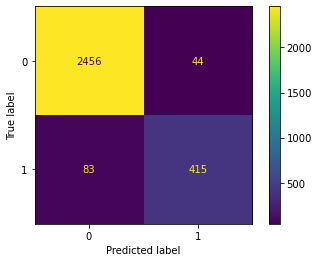

In [75]:
# Calculate the values for each quadrant in the confusion matrix
cm = metrics.confusion_matrix(y_test, rf_preds2, labels=rf_cv2.classes_)

# Create the confusion matrix as a visualisation
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_cv2.classes_)

# Plot confusion matrix
disp.plot(values_format='')

# Display the confusion matrix
plt.show()

The model predicts more false positives than false negatives, which means that some employees may be identified as at risk of quitting or getting fired, when that's actually not the case. But this is still a strong model.

For exploratory purpose, we will also inspect the splits of the decision tree model and the most important features in the random forest model. 

#### Decision tree splits

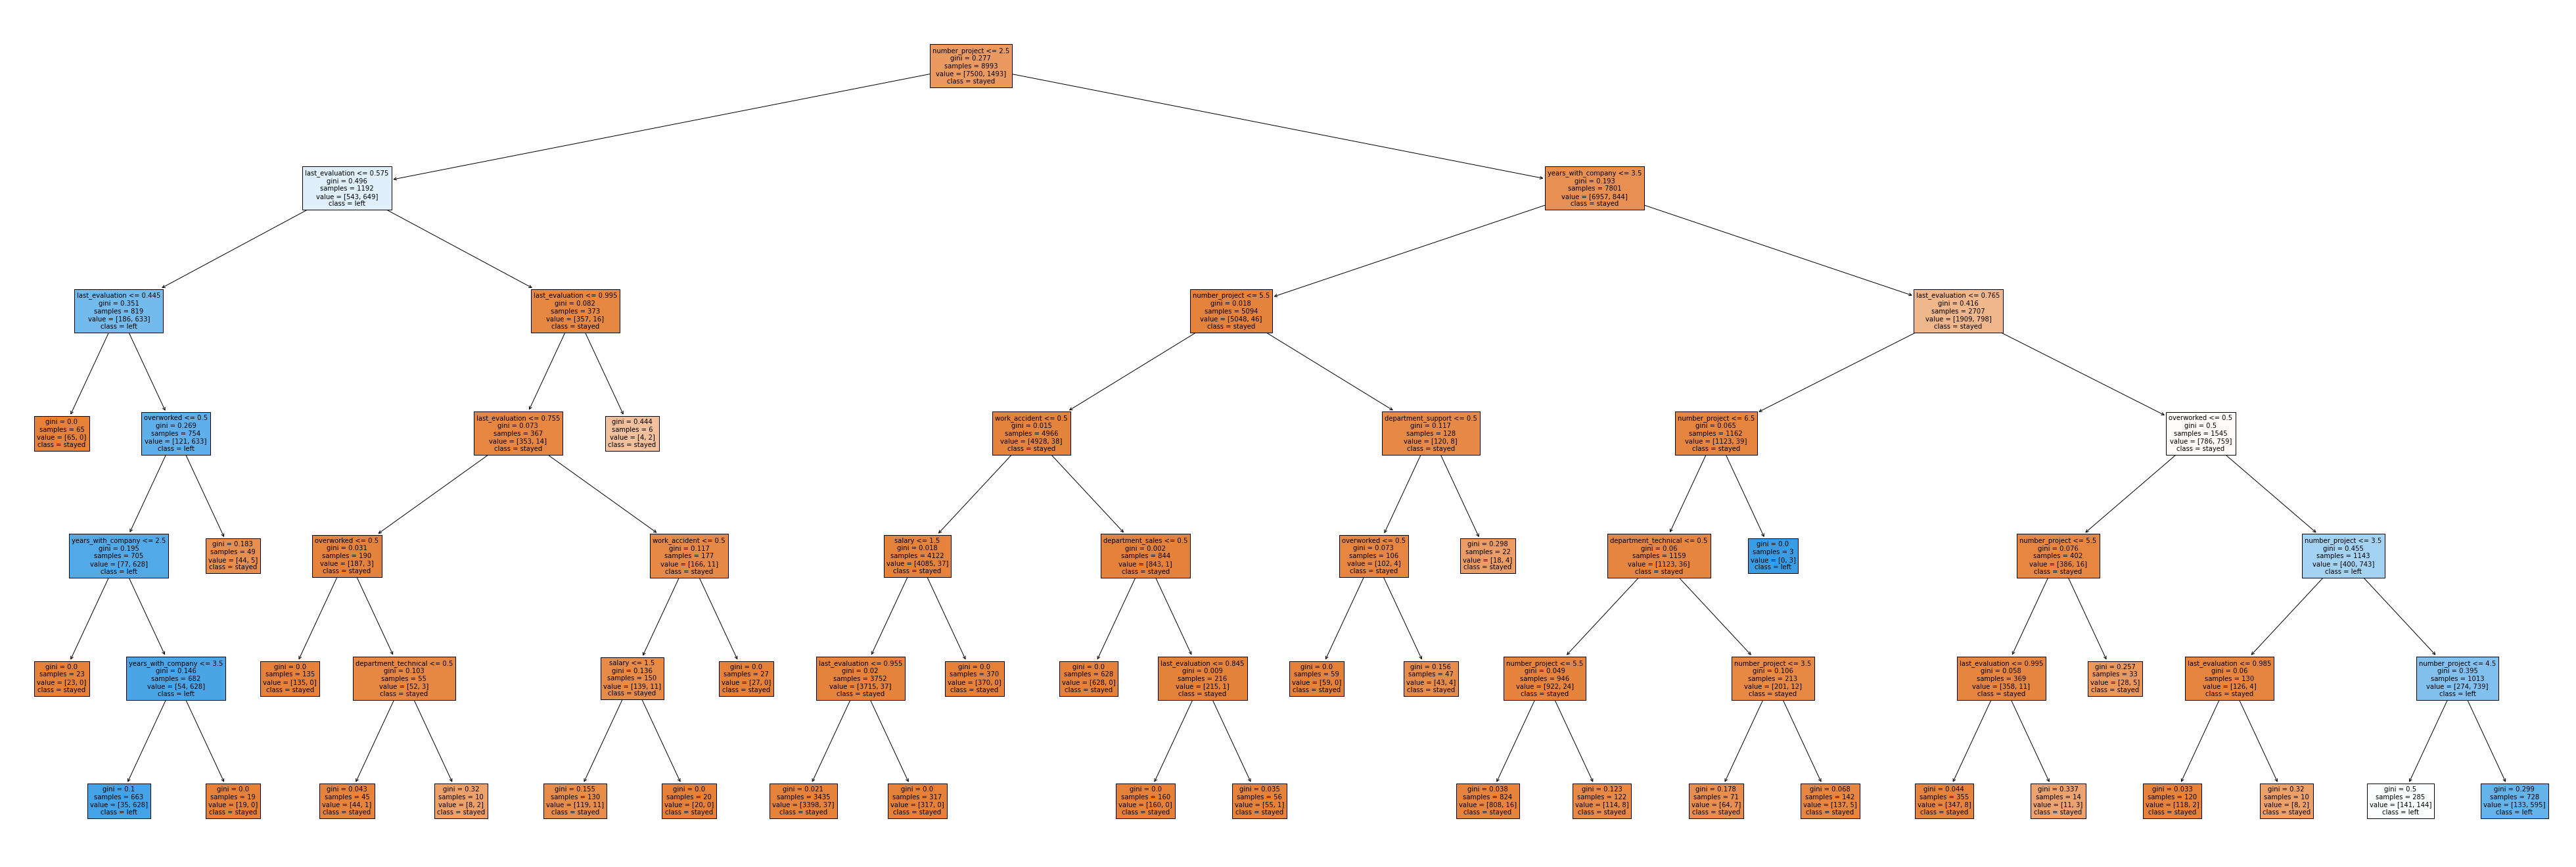

In [80]:
# Plot the decision tree
plt.figure(figsize=(70,24))
plot_tree(clf_tree2.best_estimator_, max_depth=6, fontsize=10, feature_names=X.columns,
          class_names={0:"stayed", 1:"left"}, filled=True)
plt.show()

#### Decision tree feature importance

Using the `feature_importances_` attribute, we will fetch the relative importances of each feature and present these in a table before plotting the results in a visualisation.

In [84]:
# Calculate the important features from the featured engineered decision tree model and save into a dataframe
importances = pd.DataFrame(clf_tree2.best_estimator_.feature_importances_,
                           columns=['gini_importance'],
                           index=X.columns)

# Sort the 'importances' dataframe in descending order
importances = importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
importances = importances[importances['gini_importance'] > 0]
importances

,gini_importance
last_evaluation,0.348228
number_project,0.302204
years_with_company,0.196105
overworked,0.152230
department_technical,0.000464
department_support,0.000413
work_accident,0.000181
salary,0.000171
department_sales,0.000004


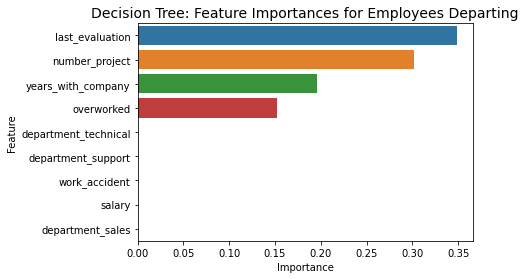

In [85]:
# Create a barplot to visualise the decision tree feature importances
sns.barplot(data=importances, x='gini_importance', y=importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employees Departing", fontsize=14)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The barplot above shows that in this decision tree model, `last_evaluation`, `number_project`, `years_with_company`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`.

#### Random forest feature importance

We'll now repeat the same process as previously undertaken to determine the feature importances for the random forest model.

In [88]:
# Calculate the important features from the featured engineered random forest model and save to a new dataframe
rf_importances = pd.DataFrame(rf_cv2.best_estimator_.feature_importances_,
                              columns=['gini_importance'],
                              index=X.columns)

# Sort the 'rf_importances' dataframe in descending order
rf_importances = rf_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
rf_importances = rf_importances[rf_importances['gini_importance'] > 0]
rf_importances

,gini_importance
number_project,0.382967
last_evaluation,0.251790
years_with_company,0.234577
overworked,0.071359
salary,0.024028
work_accident,0.019828
department_technical,0.001914
department_sales,0.001817
department_RandD,0.001795
promotion_last_5years,0.001783


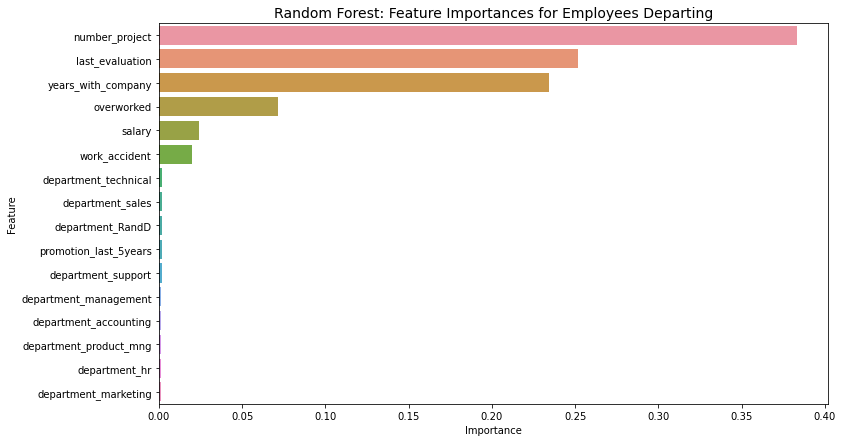

In [92]:
# Create a barplot to visualise the random forest feature importances
plt.figure(figsize=(12,7))
sns.barplot(data=rf_importances, x='gini_importance', y=rf_importances.index, orient='h')
plt.title("Random Forest: Feature Importances for Employees Departing", fontsize=14)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The plot above shows that in this random forest model, `number_project`, `last_evaluation`, `years_with_company`, `overworked`, and `salary` are the top five highest importances, in that order. These variables are the most helpful in predicting the outcome variable, `left`, and they are the same as the ones used by the decision tree model (all but the `salary` variable_.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

#### Logistic Regression

The logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%, on the test set.

#### Tree-based Machine Learning

After conducting feature engineering,  our random forest model achieved an ROC AUC of 90.8%, accuracy of 95.8%, precision of 90.4%, recall of 83.3%, and an f1-score of 86.7%, on the test set. During the training set phase, our random forest model mostly outperformed the decision tree model. However, the scores of the decision tree model were reliable and strong, indicating that it would have performed well as the champion model as well.


### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked. 

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied. 
* Either reward employees for working longer hours, or don't require them to do so. 
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 

**Next Steps**

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when `last_evaluation` is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score. 

For another project, you could try building a K-means model on this data and analyzing the clusters. This may yield valuable insight. 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.